In [58]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# extract data from zip file
import zipfile
import os

# Define the path to your zip file and the directory where you want to extract it
zip_file_path = '/content/drive/MyDrive/465 Project/new_archive.zip'
extract_folder_path = '/content/data'

os.makedirs(extract_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

In [60]:
# lib imports
import torch
import os
import numpy as np
import pandas as pd
import random
import cv2

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [61]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
IMG_COUNT = 480

In [62]:
# set this between [1, 10] for differently composed datasets
# reference: https://arxiv.org/pdf/2307.05911.pdf
TRAINING_SET = 1

# 10 Different training sets as mentioned in original paper

In [63]:
#@title This cell is for composing the datasets as mentioned in the original paper

# Set the target image size
target_size = (IMG_WIDTH, IMG_HEIGHT)

# Create empty lists to hold the images and masks
images = []
masks = []

image_dir_ms = '/content/data/GRAIN DATA SET/RG'
mask_dir_ms = '/content/data/GRAIN DATA SET/RGMask'
# vt stands for voronoi tessellation
image_dir_vt = '/content/data/GRAIN DATA SET/AG'
mask_dir_vt = '/content/data/GRAIN DATA SET/AGMask'

image_dir_hed = '/content/data/GRAIN DATA SET/HED_PRE'
mask_dir_hed = '/content/data/GRAIN DATA SET/RGMask'

image_dir_grad = '/content/data/GRAIN DATA SET/GRAD_PRE'
mask_dir_grad = '/content/data/GRAIN DATA SET/RGMask'

image_dir_thresh = '/content/data/GRAIN DATA SET/THRESH_PRE'
mask_dir_thresh = '/content/data/GRAIN DATA SET/RGMask'

if TRAINING_SET==1:
    # 100% Manually Segmented
    print("Selected Training Set 1")
    print("Manually Segmented - 100% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==2:
    # 25% Artificial, 75% Manually Segmented (160, 480)
    print("Selected Training Set 2")
    print("Voronoi Tessellation - 25% (160)")
    print("Manually Segmented - 75% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==160:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==160:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==3:
    # 50% Artificial, 50% Manually Segmented (480, 480)
    print("Selected Training Set 3")
    print("Voronoi Tessellation - 50% (480)")
    print("Manually Segmented - 50% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==4:
    # 75% Artificial, 25% Manually Segmented (800, 266)
    print("Selected Training Set 4")
    print("Voronoi Tessellation - 75% (800)")
    print("Manually Segmented - 25% (266)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==266:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==266:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==5:
    # 100% Artificial (800)
    print("Selected Training Set 5")
    print("Voronoi Tessellation - 100% (800)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==6:
    # 50% HED Preprocessed, 50% Manually Segmented (240, 240)
    print("Selected Training Set 6")
    print("HED Preprocessed - 50% (240)")
    print("Manually Segmented - 50% (240)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==7:
    # 50% Manually Segmented, 25% Artificial, 25% HED Preprocessed(240, 120, 120)
    print("Selected Training Set 7")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("HED Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


elif TRAINING_SET==8:
    # 50% Manually Segmented, 25% Artificial, 25% GRAD Preprocessed(240, 120, 120)
    print("Selected Training Set 8")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("GRAD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==9:
    # 50% Manually Segmented, 25% Artificial, 25% THRESHOLD Preprocessed(240, 120, 120)
    print("Selected Training Set 9")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("THRESHOLD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==10:
    # 50% Manually Segmented, 16.67% HED Prep., 16.67% GRAD Prep.,16.67% THRESHOLD Prep.(240, 80, 80, 80)
    print("Selected Training Set 10")
    print("Manually Segmented - 50% (240)")
    print("HED Preprocessed - 16.67% (80)")
    print("GRAD Preprocessed - 16.67% (80)")
    print("THRESHOLD Preprocessed - 16.67% (80)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1



IMG_COUNT = len(images)
print(f"image count : {IMG_COUNT}")

Selected Training Set 1
Manually Segmented - 100% (480)
image count : 480


In [64]:
# # Set the directories containing the images and masks
# image_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AG'
# mask_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AGMask'

# # Set the target image size
# target_size = (IMG_WIDTH, IMG_HEIGHT)

# # Create empty lists to hold the images and masks
# images = []
# masks = []

# # Iterate through the directories and load the images and masks
# for file in sorted(os.listdir(image_dir)):
#     # Load the image and resize to the target size
#     img = cv2.imread(os.path.join(image_dir, file))
#     img = cv2.resize(img, target_size)

#     # Append the resized image to the list of images
#     images.append(img)

# for file in sorted(os.listdir(mask_dir)):

#     # Load the corresponding mask and resize to the target size
#     #mask_file = file.replace('.jpg', '.png')
#     mask = cv2.imread(os.path.join(mask_dir, file))
#     mask = cv2.resize(mask, target_size)

#     # Append the resized mask to the list of masks
#     masks.append(mask)

# IMG_COUNT = len(images)

# Example Image and it's Ground Truth

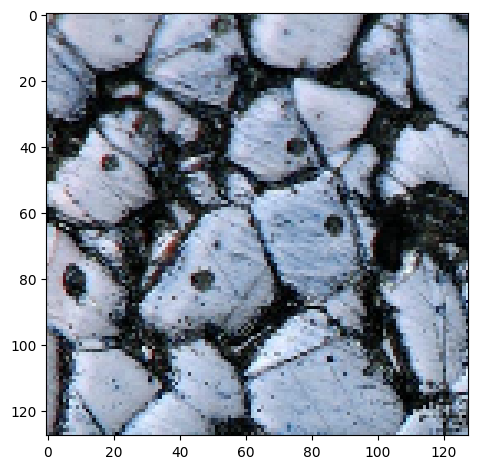

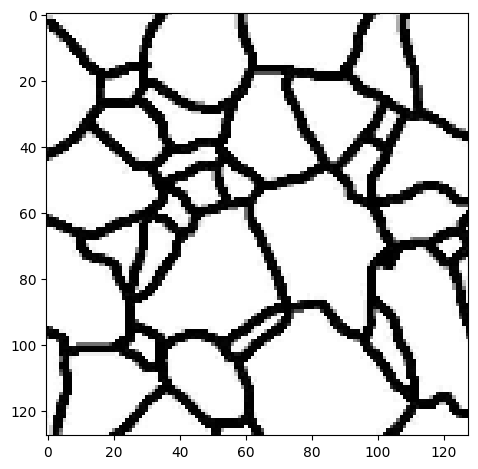

In [65]:
# example
image_x = random.randint(0, IMG_COUNT)
image_x
imshow(images[image_x])
plt.show()
imshow(masks[image_x])
plt.show()

# Nested Unet Model

In [74]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):

    def __init__(self, in_channels, middle_channels, out_channels):
        super().__init__()
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, middle_channels, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(middle_channels)
        self.conv2 = nn.Conv2d(middle_channels, out_channels, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.SE = Squeeze_Excite(out_channels, 8)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.SE(out)

        return out

class Squeeze_Excite(nn.Module):

    def __init__(self, channel, reduction):
        super().__init__()
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avgpool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class UNetPlusPlus(nn.Module):

    def __init__(self, num_classes, input_channels=3, deep_supervision=False, **kwargs):
        super().__init__()

        nb_filter = [32, 64, 128, 256, 512]

        self.deep_supervision = deep_supervision

        self.pool = nn.MaxPool2d(2, 2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.conv0_0 = ConvBlock(input_channels, nb_filter[0], nb_filter[0])
        self.conv1_0 = ConvBlock(nb_filter[0], nb_filter[1], nb_filter[1])
        self.conv2_0 = ConvBlock(nb_filter[1], nb_filter[2], nb_filter[2])
        self.conv3_0 = ConvBlock(nb_filter[2], nb_filter[3], nb_filter[3])
        self.conv4_0 = ConvBlock(nb_filter[3], nb_filter[4], nb_filter[4])

        self.conv0_1 = ConvBlock(nb_filter[0]+nb_filter[1], nb_filter[0], nb_filter[0])
        self.conv1_1 = ConvBlock(nb_filter[1]+nb_filter[2], nb_filter[1], nb_filter[1])
        self.conv2_1 = ConvBlock(nb_filter[2]+nb_filter[3], nb_filter[2], nb_filter[2])
        self.conv3_1 = ConvBlock(nb_filter[3]+nb_filter[4], nb_filter[3], nb_filter[3])

        self.conv0_2 = ConvBlock(nb_filter[0]*2+nb_filter[1], nb_filter[0], nb_filter[0])
        self.conv1_2 = ConvBlock(nb_filter[1]*2+nb_filter[2], nb_filter[1], nb_filter[1])
        self.conv2_2 = ConvBlock(nb_filter[2]*2+nb_filter[3], nb_filter[2], nb_filter[2])

        self.conv0_3 = ConvBlock(nb_filter[0]*3+nb_filter[1], nb_filter[0], nb_filter[0])
        self.conv1_3 = ConvBlock(nb_filter[1]*3+nb_filter[2], nb_filter[1], nb_filter[1])

        self.conv0_4 = ConvBlock(nb_filter[0]*4+nb_filter[1], nb_filter[0], nb_filter[0])

        if self.deep_supervision:
            self.final1 = nn.Conv2d(nb_filter[0], num_classes, kernel_size=1)
            self.final2 = nn.Conv2d(nb_filter[0], num_classes, kernel_size=1)
            self.final3 = nn.Conv2d(nb_filter[0], num_classes, kernel_size=1)
            self.final4 = nn.Conv2d(nb_filter[0], num_classes, kernel_size=1)
        else:
            self.final = nn.Conv2d(nb_filter[0], num_classes, kernel_size=1)

    def forward(self, input):
        x0_0 = self.conv0_0(input)
        x1_0 = self.conv1_0(self.pool(x0_0))
        x0_1 = self.conv0_1(torch.cat([x0_0, self.up(x1_0)], 1))

        x2_0 = self.conv2_0(self.pool(x1_0))
        x1_1 = self.conv1_1(torch.cat([x1_0, self.up(x2_0)], 1))
        x0_2 = self.conv0_2(torch.cat([x0_0, x0_1, self.up(x1_1)], 1))

        x3_0 = self.conv3_0(self.pool(x2_0))
        x2_1 = self.conv2_1(torch.cat([x2_0, self.up(x3_0)], 1))
        x1_2 = self.conv1_2(torch.cat([x1_0, x1_1, self.up(x2_1)], 1))
        x0_3 = self.conv0_3(torch.cat([x0_0, x0_1, x0_2, self.up(x1_2)], 1))

        x4_0 = self.conv4_0(self.pool(x3_0))
        x3_1 = self.conv3_1(torch.cat([x3_0, self.up(x4_0)], 1))
        x2_2 = self.conv2_2(torch.cat([x2_0, x2_1, self.up(x3_1)], 1))
        x1_3 = self.conv1_3(torch.cat([x1_0, x1_1, x1_2, self.up(x2_2)], 1))
        x0_4 = self.conv0_4(torch.cat([x0_0, x0_1, x0_2, x0_3, self.up(x1_3)], 1))

        if self.deep_supervision:
            output1 = self.final1(x0_1)
            output2 = self.final2(x0_2)
            output3 = self.final3(x0_3)
            output4 = self.final4(x0_4)
            return [output1, output2, output3, output4]

        else:
            output = self.final(x0_4)
            return torch.sigmoid(output)
# Instantiate the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNetPlusPlus(in_channels=3, num_classes=1, deep_supervision=False).to(device)

In [75]:
from torchsummary import summary
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 32, 128, 128]           9,248
       BatchNorm2d-5         [-1, 32, 128, 128]              64
              ReLU-6         [-1, 32, 128, 128]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Linear-8                    [-1, 4]             128
              ReLU-9                    [-1, 4]               0
           Linear-10                   [-1, 32]             128
          Sigmoid-11                   [-1, 32]               0
   Squeeze_Excite-12         [-1, 32, 128, 128]               0
        ConvBlock-13         [-1, 32, 128, 128]               0
        MaxPool2d-14           [-1, 32,

# dataset splitting

In [76]:
# create the X and Y (input and output)

X_train = np.array(images)
Y_train = np.array(masks)
print(X_train.shape, Y_train.shape)
# change the Y to a boolean
Y_train = np.where(Y_train > 245, True, False)

(480, 128, 128, 3) (480, 128, 128, 3)


In [77]:
# careful to run this cell only once (otherwise shape changes)
X_train = np.transpose(X_train, (0, 3, 1 , 2))
Y_train = np.transpose(Y_train, (0, 3, 1 , 2))
print(X_train.shape, Y_train.shape)

(480, 3, 128, 128) (480, 3, 128, 128)


In [78]:
#convert the boolean where it insion s true (any of the 3 channels) to a (336, 128, 128, 1)
#basically reduce the 3 channel dimeRGB to just one boolean value

Y_t= np.any(Y_train, axis=1)
print(Y_t.shape)
Y_t = Y_t.reshape(IMG_COUNT, 1, 128, 128)
print(Y_t.shape)


(480, 128, 128)
(480, 1, 128, 128)


In [79]:
# prompt: Make Dataset from data

from torch.utils.data import Dataset

class GrainDataset(Dataset):
    def __init__(self, images, masks):
        self.images = images
        self.masks = masks

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx]).float()
        mask = torch.from_numpy(self.masks[idx]).float()
        return image, mask

# Create the dataset
dataset = GrainDataset(X_train, Y_t)



In [80]:
# prompt: create train and validation dataset

from torch.utils.data import random_split

# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])



In [81]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

# Define DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define callbacks
class ModelCheckpoint:
    def __init__(self, checkpoint_path):
        self.checkpoint_path = checkpoint_path
        self.best_loss = float('inf')

    def __call__(self, model, epoch, train_loss, val_loss):
        if val_loss < self.best_loss:
            torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'train_loss' : train_loss,
            'val_loss': val_loss,
            }, self.checkpoint_path)
            print("Checkpoint saved")
            self.best_loss = val_loss

from datetime import datetime
checkpoint_path = f'/content/drive/MyDrive/465 Project/Unet Checkpoints/TrainingSet{TRAINING_SET}_{datetime.now().strftime("%d%m%Y %H:%M:%S")}.pt'
# print(checkpoint_path)
# os.makedirs("/content/drive/MyDrive/465 Project", exist_ok=True) # already exists
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpointer = ModelCheckpoint(checkpoint_path)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training
    for inputs, targets in train_loader:
        if device == 'cuda':
            inputs, targets = inputs.cuda(), targets.cuda()
        optimizer.zero_grad()
        # print(inputs.shape)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            if device == 'cuda':
                inputs, targets = inputs.cuda(), targets.cuda()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    # Average losses
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Call the ModelCheckpoint callback
    checkpointer(model,epoch, train_loss, val_loss)


Epoch [1/30], Train Loss: 0.5299, Val Loss: 0.4923
Checkpoint saved
Epoch [2/30], Train Loss: 0.4630, Val Loss: 0.4508
Checkpoint saved
Epoch [3/30], Train Loss: 0.4261, Val Loss: 0.4398
Checkpoint saved
Epoch [4/30], Train Loss: 0.3979, Val Loss: 0.4075
Checkpoint saved
Epoch [5/30], Train Loss: 0.3730, Val Loss: 0.3830
Checkpoint saved
Epoch [6/30], Train Loss: 0.3506, Val Loss: 0.3558
Checkpoint saved
Epoch [7/30], Train Loss: 0.3332, Val Loss: 0.3407
Checkpoint saved
Epoch [8/30], Train Loss: 0.3133, Val Loss: 0.3547
Epoch [9/30], Train Loss: 0.2970, Val Loss: 0.3845
Epoch [10/30], Train Loss: 0.2804, Val Loss: 0.3355
Checkpoint saved
Epoch [11/30], Train Loss: 0.2672, Val Loss: 0.3187
Checkpoint saved
Epoch [12/30], Train Loss: 0.2566, Val Loss: 0.3617
Epoch [13/30], Train Loss: 0.2426, Val Loss: 0.3408
Epoch [14/30], Train Loss: 0.2303, Val Loss: 0.3557
Epoch [15/30], Train Loss: 0.2189, Val Loss: 0.3483
Epoch [16/30], Train Loss: 0.2110, Val Loss: 0.3754
Epoch [17/30], Train Los

In [82]:
current_checkpoint = torch.load(checkpoint_path)
model.load_state_dict(current_checkpoint['model_state_dict'])
model.eval()
print(current_checkpoint['train_loss'],current_checkpoint['val_loss'])

0.267229908456405 0.31874896089235943


In [83]:
def display_results(image, ground_truth_mask, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display input image
    axes[0].imshow(np.transpose(image, (1, 2, 0)))
    axes[0].set_title('Input Image')

    # Display ground truth mask
    axes[1].imshow(np.squeeze(ground_truth_mask))
    axes[1].set_title('Ground Truth Mask')

    # Display predicted mask
    axes[2].imshow(np.squeeze(predicted_mask))
    axes[2].set_title('Predicted Mask')

    plt.show()

In [84]:
!pip install torchmetrics

In [85]:
# from torchmetrics.functional import dice
# from torchmetrics.functional import jaccard_index

# total_jaccard_score = 0.0
# total_dice_score = 0.0
# total_num_samples = 0

# for images, masks in val_loader:
#     batch_size = images.size(0)  # Get the actual batch size
#     total_num_samples += batch_size

#     with torch.no_grad():
#         images = images.to(device)
#         masks = masks.to(device)

#         # Forward pass
#         preds = model(images)

#         for ind in range(len(preds)):
#             pred_tensor = (preds[ind] > 0.5).float()
#             gt_tensor = masks[ind].to(torch.int64)  # Convert mask tensor to integer tensor

#             dice_score = dice(pred_tensor, gt_tensor)
#             total_dice_score += dice_score.item()

#             jaccard_score = jaccard_index(pred_tensor, gt_tensor, task='binary')
#             total_jaccard_score += jaccard_score.item()

# average_dice_score = total_dice_score / total_num_samples
# average_jaccard_score = total_jaccard_score / total_num_samples


# print(f"Total Number samples: {total_num_samples}")
# print(f"Average Dice Score: {average_dice_score}")
# print(f"Average Jaccard Index: {average_jaccard_score}")

In [86]:
# using the while RG dataset as validation dataset to calculate dice score
rg_image_dir = '/content/data/GRAIN DATA SET/RG'
rg_mask_dir = '/content/data/GRAIN DATA SET/RGMask'

images = []
masks = []

# Iterate through the directories and load the images and masks
for file in sorted(os.listdir(rg_image_dir)):
    # Load the image and resize to the target size
    img = cv2.imread(os.path.join(rg_image_dir, file))
    img = cv2.resize(img, target_size)

    # Append the resized image to the list of images
    images.append(img)

for file in sorted(os.listdir(rg_mask_dir)):

    # Load the corresponding mask and resize to the target size
    mask = cv2.imread(os.path.join(rg_mask_dir, file))
    mask = cv2.resize(mask, target_size)

    # Append the resized mask to the list of masks
    masks.append(mask)


In [87]:
# create the X and Y (input and output)

X_rg = np.array(images)
Y_rg = np.array(masks)
print(X_rg.shape, Y_rg.shape)
# change the Y to a boolean
Y_rg = np.where(Y_rg > 245, True, False)

(480, 128, 128, 3) (480, 128, 128, 3)


In [88]:
# careful to run this cell only once (otherwise shape changes)
X_rg = np.transpose(X_rg, (0, 3, 1 , 2))
Y_rg = np.transpose(Y_rg, (0, 3, 1 , 2))
print(X_rg.shape, Y_rg.shape)

(480, 3, 128, 128) (480, 3, 128, 128)


In [89]:
#convert the boolean where it insion s true (any of the 3 channels) to a (336, 128, 128, 1)
#basically reduce the 3 channel dimeRGB to just one boolean value

Y_t= np.any(Y_rg, axis=1)
print(Y_t.shape)
Y_t = Y_t.reshape(480, 1, 128, 128)
print(Y_t.shape)


(480, 128, 128)
(480, 1, 128, 128)


# Results

In [90]:
dataset = GrainDataset(X_rg, Y_t)
rg_val_loader = DataLoader(dataset,batch_size=16, shuffle=False)

from torchmetrics.functional import dice
from torchmetrics.functional import jaccard_index

total_jaccard_score = 0.0
total_dice_score = 0.0
total_num_samples = 0

for images, masks in rg_val_loader:
    batch_size = images.size(0)  # Get the actual batch size
    total_num_samples += batch_size

    with torch.no_grad():
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        preds = model(images)

        for ind in range(len(preds)):
            pred_tensor = (preds[ind] > 0.5).float()
            gt_tensor = masks[ind].to(torch.int64)  # Convert mask tensor to integer tensor

            dice_score = dice(pred_tensor, gt_tensor)
            total_dice_score += dice_score.item()

            jaccard_score = jaccard_index(pred_tensor, gt_tensor, task='binary')
            total_jaccard_score += jaccard_score.item()

average_dice_score = total_dice_score / total_num_samples
average_jaccard_score = total_jaccard_score / total_num_samples

print(f"Training set: {TRAINING_SET}")
print(f"Total Number samples: {total_num_samples}")
print(f"Average Dice Score: {average_dice_score}")
print(f"Average Jaccard Index: {average_jaccard_score}")

Training set: 1
Total Number samples: 480
Average Dice Score: 0.9169342391192913
Average Jaccard Index: 0.84698014917473
